## from video "Zero to Deep Learning with Python and Keras"

使用 "make_moons" dataset.
只是單純的二分類用資料集，訓練非線性的。

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)

In [12]:
?make_moons()

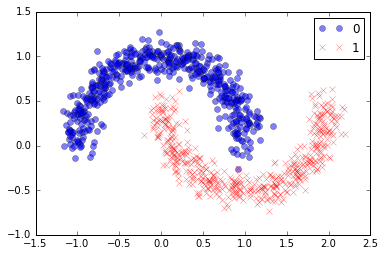

In [13]:
plt.plot(X[y==0,0], X[y==0,1], 'ob', alpha=0.5)
plt.plot(X[y==1,0], X[y==1,1], 'xr', alpha=0.5)
plt.legend(['0','1'])

In [14]:
X.shape

(1000, 2)

In [22]:
print np.var(X)  # 方差
print np.std(X[0])  # 標準差

0.525229977255
0.76229557188


In [24]:
## 常用切割 train / test data
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.3,
                                                   random_state = 42)
X_train[0]

array([ 1.76205245, -0.14570237])

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

## Shallow Model

In [31]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=200, verbose=2)  # 若不要看運算verbose=0

Epoch 1/200
0s - loss: 0.6124 - acc: 0.6614
Epoch 2/200
0s - loss: 0.3511 - acc: 0.8814
Epoch 3/200
0s - loss: 0.2784 - acc: 0.8857
Epoch 4/200
0s - loss: 0.2563 - acc: 0.8843
Epoch 5/200
0s - loss: 0.2467 - acc: 0.8857
Epoch 6/200
0s - loss: 0.2406 - acc: 0.8871
Epoch 7/200
0s - loss: 0.2367 - acc: 0.8871
Epoch 8/200
0s - loss: 0.2333 - acc: 0.8871
Epoch 9/200
0s - loss: 0.2312 - acc: 0.8857
Epoch 10/200
0s - loss: 0.2295 - acc: 0.8871
Epoch 11/200
0s - loss: 0.2279 - acc: 0.8871
Epoch 12/200
0s - loss: 0.2279 - acc: 0.8857
Epoch 13/200
0s - loss: 0.2269 - acc: 0.8886
Epoch 14/200
0s - loss: 0.2261 - acc: 0.8843
Epoch 15/200
0s - loss: 0.2253 - acc: 0.8886
Epoch 16/200
0s - loss: 0.2254 - acc: 0.8871
Epoch 17/200
0s - loss: 0.2249 - acc: 0.8886
Epoch 18/200
0s - loss: 0.2246 - acc: 0.8871
Epoch 19/200
0s - loss: 0.2252 - acc: 0.8871
Epoch 20/200
0s - loss: 0.2248 - acc: 0.8886
Epoch 21/200
0s - loss: 0.2249 - acc: 0.8886
Epoch 22/200
0s - loss: 0.2247 - acc: 0.8857
Epoch 23/200
0s - l

In [33]:
results = model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

In [36]:
print "The accuracy score is", results[1]

The accuracy score is 0.843333334128


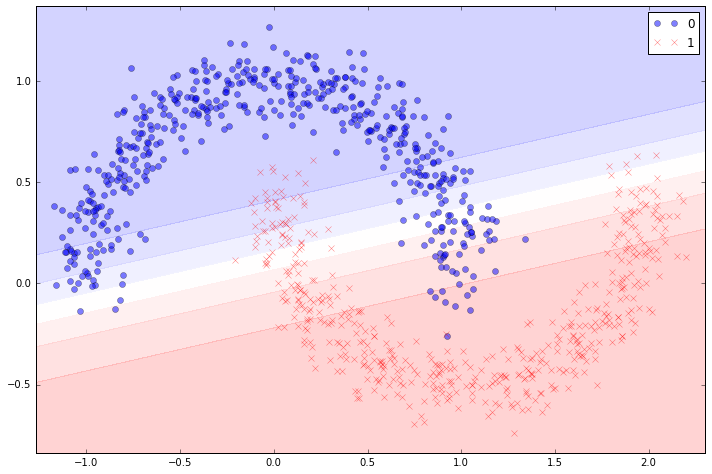

In [37]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)  # 根據給定的座標向量創建座標矩陣。
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

## Deep model

In [38]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=100, verbose=0)
model.evaluate(X_test, y_test)

 32/300 [==>...........................] - ETA: 0s

[0.032636063520330938, 0.98999999999999999]

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

 32/300 [==>...........................] - ETA: 0sThe Accuracy score on the Train set is:	0.997
The Accuracy score on the Test set is:	0.990


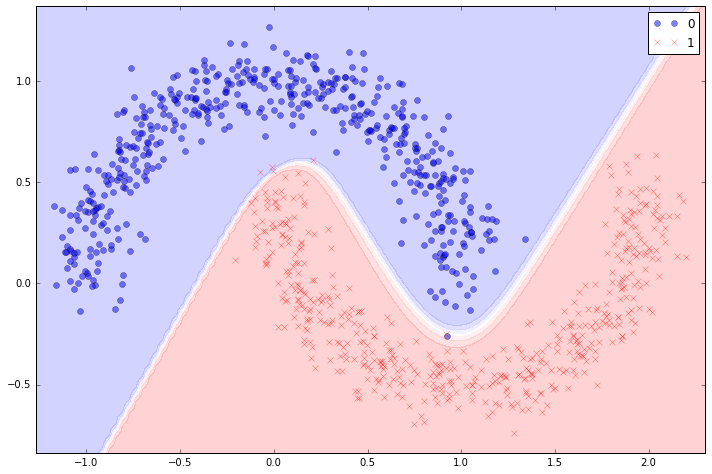

In [41]:
plot_decision_boundary(model, X, y)